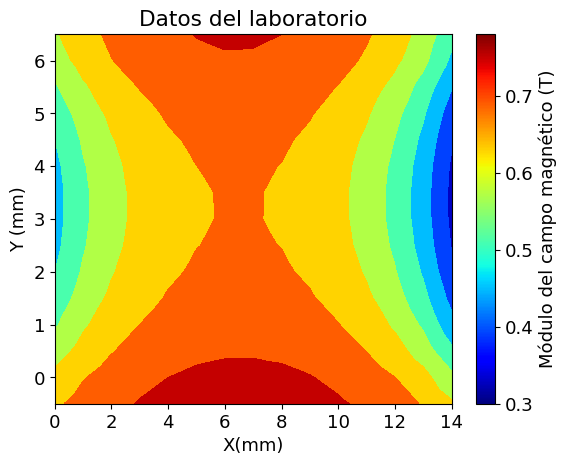

In [14]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable

plt.rcParams['font.size'] = 13
# generate example data
import pandas as pd

data = pd.read_csv('CMAP_LAB.txt', sep = '\s+', header = None)
data = pd.DataFrame(data)

x = data[0] + 11
y = data[1]
HmT = abs(data[3])

#mT to T

HT = 0.001*HmT

N = 10000
nx = 10*int(np.sqrt(N))
xg = np.linspace(x.min(), x.max(), nx)
yg = np.linspace(y.min(), y.max(), nx)
xgrid, ygrid = np.meshgrid(xg,yg)
ctr_f = griddata((x,y), HT, (xgrid, ygrid), method = 'linear')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
c = ax.contourf(xgrid, ygrid, ctr_f, cmap='jet')
cbar = fig.colorbar(ScalarMappable(norm=c.norm, cmap=c.cmap))
plt.xlabel('X(mm)', fontsize=13)
#plt.grid()
plt.ylabel('Y (mm)', fontsize=13)
plt.title('Datos del laboratorio')
cbar.set_label(label = 'Módulo del campo magnético (T)', size = 13)

plt.show()

COMSOL

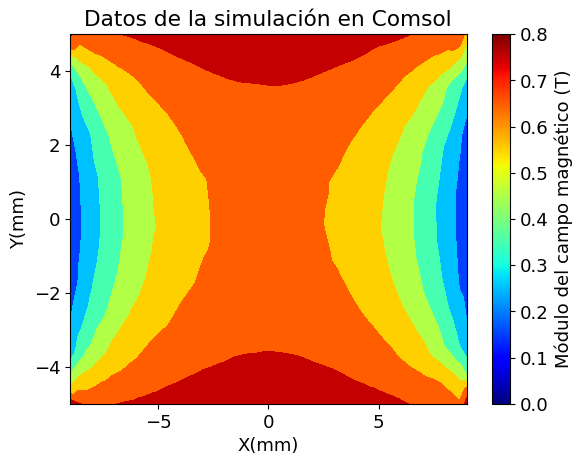

In [12]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable

plt.rcParams['font.size'] = 13
# generate example data
import pandas as pd

data = pd.read_csv('CMAP_COMSOL.txt', sep = '\s+', header = None)
data = pd.DataFrame(data)

x = data[0]
y = data[1]
H = data[3]

N = 10000
nx = 10*int(np.sqrt(N))
xg = np.linspace(x.min(), x.max(), nx)
yg = np.linspace(y.min(), y.max(), nx)
xgrid, ygrid = np.meshgrid(xg,yg)
ctr_f = griddata((x,y), H, (xgrid, ygrid), method = 'linear')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
c = ax.contourf(xgrid, ygrid, ctr_f, levels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],cmap='jet')
cbar = fig.colorbar(ScalarMappable(norm=c.norm, cmap=c.cmap))
plt.xlim(-9,9)
plt.ylim(-5,5)
plt.xlabel('X(mm)',fontsize=13)
plt.ylabel('Y(mm)',fontsize=13)
cbar.set_label(label = 'Módulo del campo magnético (T)', size = 13)
plt.title('Datos de la simulación en Comsol')
plt.show()